In [352]:
import scipy.integrate as spi
import numpy as np
import random

class SEIR:
    def __init__(self,s0,e0,i0,level):
        self.s0=s0
        self.e0=e0
        self.i0=i0
        self.r0=1-self.s0-self.e0-self.i0
        self.level=level
        
        
    def predict(self,INP,t):
        if self.level==1:
            lamuda=1
            sita=0.8
            miu=0.8
        if self.level==2:
            lamuda=1
            sita=0.9
            miu=0.78
        if self.level==3:
            lamuda=1
            sita=1
            miu=0.7
        previous=INP
        preduct=np.zeros(4)
        preduct[0]=-lamuda*previous[0]*previous[2]
        preduct[1] = lamuda * previous[0] * previous[2] - sita * previous[1]
        preduct[2] = sita * previous[1] - miu * previous[2]
        preduct[3] = miu * previous[2]
        return preduct
    def predict_alltime(self,day_time):
        data=(self.s0,self.e0,self.i0,self.r0)
        pre_alltime=spi.odeint(self.predict,data,day_time)
        return pre_alltime
    
    def main():
        sier=SIER()
        day_time=np.range(1,160,1)
        res=sir.predict_alltime(day_time)
    
        if __name__=="__main__":
            main()

这上面就是我们的SEIR模型。将城市的等级分为了三个等级，第一等级为防范良好的城市，发现病例之后可以快速预防。第二等级为稍弱的城市，第三等级为防范意识薄弱，或者没有防范意识的城市。接下来就是我们的分析。

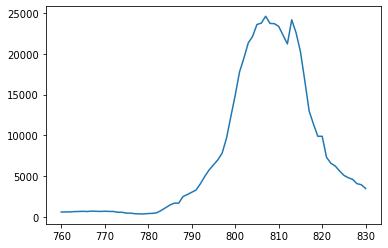

In [253]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
 
with open("上海.json", "r") as f:
    json_data = json.load(f)
    shanghai_data = pd.DataFrame(json_data["data"])
current_confirm = shanghai_data.currentConfirmedCount.iloc[760:]
plt.plot(current_confirm)
plt.show()

上图为原来的上海疫情图，我们截取了部分来作为实验。

In [260]:
all_person=pd.read_csv("population7th.csv")
all_person_number=all_person[all_person.Province == "上海"].iloc[0, 1]//15

shanghai_i0 = shanghai_data.loc[760, "currentConfirmedCount"]/all_person_number
shanghai_r0 = (shanghai_data.loc[760, "deadCount"]+shanghai_data.loc[780, "curedCount"])/all_person_number
shanghai_s0 = (1 - shanghai_i0 - shanghai_r0)

print(all_person_number,shanghai_i0,shanghai_r0,shanghai_s0)

1658059 0.00035101284091820616 0.002919075859182333 0.9967299112998994


上面的数据为上海的一些相关数据。

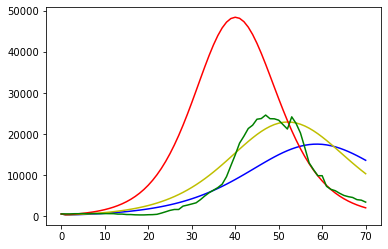

In [353]:
shanghai_seir1=SEIR(s0=shanghai_s0,i0=shanghai_i0,e0=0,level=1)
shanghai_seir2=SEIR(s0=shanghai_s0,i0=shanghai_i0,e0=0,level=2)
shanghai_seir3=SEIR(s0=shanghai_s0,i0=shanghai_i0,e0=0,level=3)
start=760
end=shanghai_data.shape[0]
pre1=shanghai_seir1.predict_alltime(np.arange(0,end-start))
pre2=shanghai_seir2.predict_alltime(np.arange(0,end-start))
pre3=shanghai_seir3.predict_alltime(np.arange(0,end-start))
pre_infected1=pre1[:,2]*all_person_number
pre_infected2=pre2[:,2]*all_person_number
pre_infected3=pre3[:,2]*all_person_number
gt_infected = shanghai_data.loc[start:end - 1, "currentConfirmedCount"].reset_index(drop=True)
plt.plot(pre_infected1, '-b', label="predict1")
plt.plot(pre_infected2, '-y',label="predict2")
plt.plot(pre_infected3, '-r',label="predict3")
plt.plot(gt_infected, '-g', label="actual")
plt.show()

从这个上面我们可以看出，上海属于二类城市，防范意识不是很强。
但这个模型缺陷明显，没有考虑到振策变化等带来的数值的变化，因此仅供参考。